In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [ ]:
data = pd.read_csv("MiddleEastWar.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476229 entries, 0 to 476228
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   event_id_cnty       476229 non-null  object 
 1   event_date          476229 non-null  object 
 2   year                476229 non-null  int64  
 3   time_precision      476229 non-null  int64  
 4   disorder_type       476229 non-null  object 
 5   event_type          476229 non-null  object 
 6   sub_event_type      476229 non-null  object 
 7   actor1              476229 non-null  object 
 8   assoc_actor_1       138369 non-null  object 
 9   inter1              476229 non-null  object 
 10  actor2              265140 non-null  object 
 11  assoc_actor_2       53943 non-null   object 
 12  inter2              265141 non-null  object 
 13  interaction         476229 non-null  object 
 14  civilian_targeting  65935 non-null   object 
 15  iso                 476229 non-nul

In [4]:
data.head(20)

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,PSE62716,2024-11-01,2024,1,Strategic developments,Strategic developments,Looting/property destruction,Settlers (Israel),NaN,Political militia,...,Shi'b Al Batim,31.3942,35.1365,1,PLO Negotiations Affairs Department,Other,"Land seizure: On 1 November 2024, Israeli sett...",0,NaN,1730758098
1,YEM93235,2024-11-01,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Yemen),Government of Yemen (2017-) Houthi,Protesters,...,Dawran ad Daydah,14.7393,44.2066,2,Yemen News Agency (SABA) - Houthi,National,"On 1 November 2024, protesters held a large Ho...",0,crowd size=large,1730758099
2,YEM93304,2024-11-01,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Yemen),Government of Yemen (2017-) Houthi,Protesters,...,Uzlat Al Aqibah,13.8786,43.7357,2,Yemen News Agency (SABA) - Houthi,National,"On 1 November 2024, protesters held a large Ho...",0,crowd size=large,1730758099
3,YEM93309,2024-11-01,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Yemen),Government of Yemen (2017-) Houthi,Protesters,...,Al Junayd,14.0842,44.0575,1,Yemen News Agency (SABA) - Houthi,National,"On 1 November 2024, protesters held a large Ho...",0,crowd size=large,1730758099
4,YEM93315,2024-11-01,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Yemen),Government of Yemen (2017-) Houthi,Protesters,...,Uzlat Al Ajum,14.0936,43.9495,2,Yemen News Agency (SABA) - Houthi,National,"On 1 November 2024, protesters held a large Ho...",0,crowd size=large,1730758099
5,YEM93316,2024-11-01,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Yemen),Government of Yemen (2017-) Houthi,Protesters,...,Uzlat Al Aslum,14.0473,43.9221,2,Yemen News Agency (SABA) - Houthi,National,"On 1 November 2024, protesters held a large Ho...",0,crowd size=large,1730758099
6,YEM93339,2024-11-01,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Yemen),Government of Yemen (2017-) Houthi,Protesters,...,Uzlat Arw,16.9411,43.5175,2,Yemen News Agency (SABA) - Houthi,National,"On 1 November 2024, protesters held a large Ho...",0,crowd size=large,1730758099
7,YEM93341,2024-11-01,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Yemen),Government of Yemen (2017-) Houthi,Protesters,...,Walad Umar,16.7910,43.3719,1,Yemen News Agency (SABA) - Houthi,National,"On 1 November 2024, protesters held a large Ho...",0,crowd size=large,1730758099
8,YEM93345,2024-11-01,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Yemen),Government of Yemen (2017-) Houthi,Protesters,...,Ar Rahmanayn,17.0190,43.2983,1,Yemen News Agency (SABA) - Houthi,National,"On 1 November 2024, protesters held a large Ho...",0,crowd size=large,1730758099
9,YEM93349,2024-11-01,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Yemen),Government of Yemen (2017-) Houthi; Military F...,Protesters,...,Az Zabirah,13.2824,44.2092,1,Yemen News Agency (SABA) - Houthi,National,"On 1 November 2024, protesters held a large Ho...",0,crowd size=large,1730758099


In [5]:
plt.rcParams['figure.figsize'] = (12,8)
default_plot_color = "#887A68"

Text(0, 0.5, '')

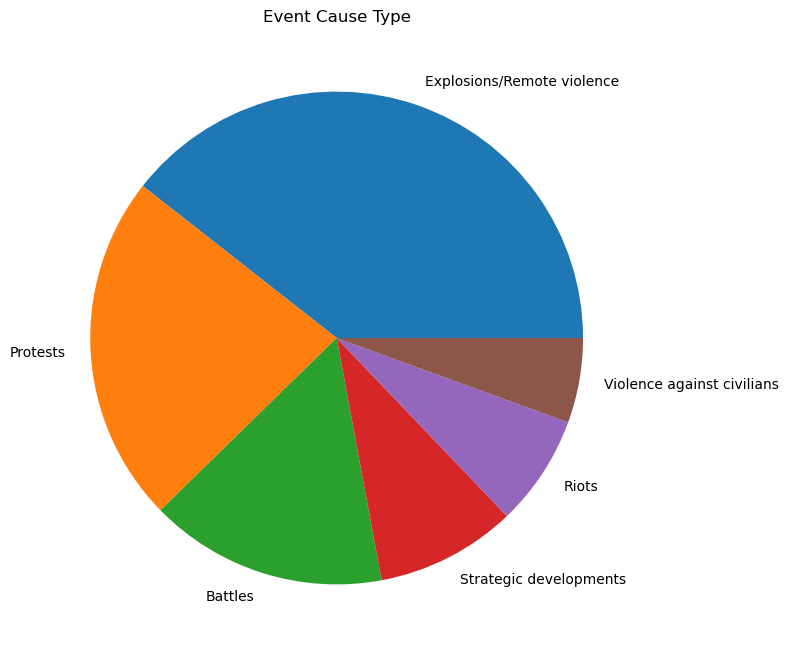

In [6]:
data['event_type'].value_counts().plot(kind="pie", color=default_plot_color)
plt.title("Event Cause Type")
plt.ylabel(None)

In [7]:
data["city_code"] = data['event_id_cnty'].str[:3]

In [8]:
city_counts = data["city_code"].value_counts()
print(city_counts)

city_code
SYR    133087
YEM     92596
PSE     61155
IRQ     59425
TUR     38477
IRN     28782
LBN     27507
ISR     14496
BHR     12995
JOR      3874
SAU      3534
KWT       130
OMN        67
QAT        61
ARE        43
Name: count, dtype: int64


In [9]:
most_frequent_event_country = data["city_code"].value_counts().idxmax()
print(most_frequent_event_country)

SYR


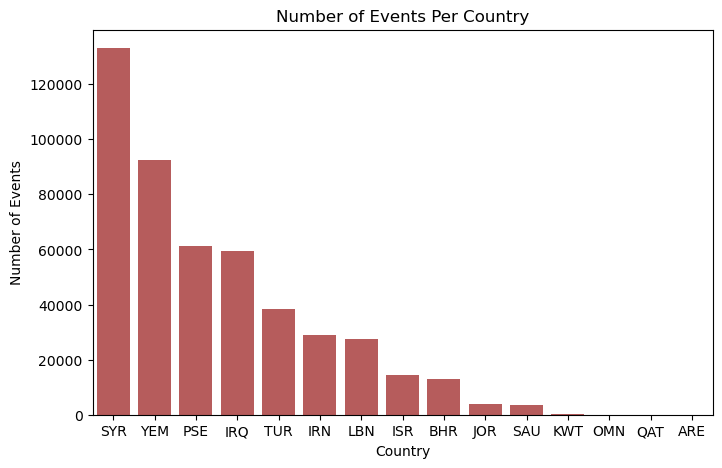

In [10]:
plt.figure(figsize=(8,5))
sns.barplot(x=city_counts.index, y=city_counts.values, color="#C54D4D", legend=False)
plt.title("Number of Events Per Country")
plt.xlabel("Country")
plt.ylabel("Number of Events")
plt.show()

In [11]:
top_locations = data.groupby(['country', 'location']).size().groupby(level=0,group_keys=False).nlargest(10).reset_index(name="count")
print(top_locations)

     country      location  count
0    Bahrain       Sanabis   1155
1    Bahrain      Al Diraz    741
2    Bahrain     Abu Saybi    671
3    Bahrain     Al Maamir    650
4    Bahrain     Nuwaidrat    560
..       ...           ...    ...
145    Yemen    At Tuhayta   1146
146    Yemen  Al Jabaliyah   1101
147    Yemen         Taizz    832
148    Yemen     Al Mashaf    820
149    Yemen  Baqim as Suq    788

[150 rows x 3 columns]


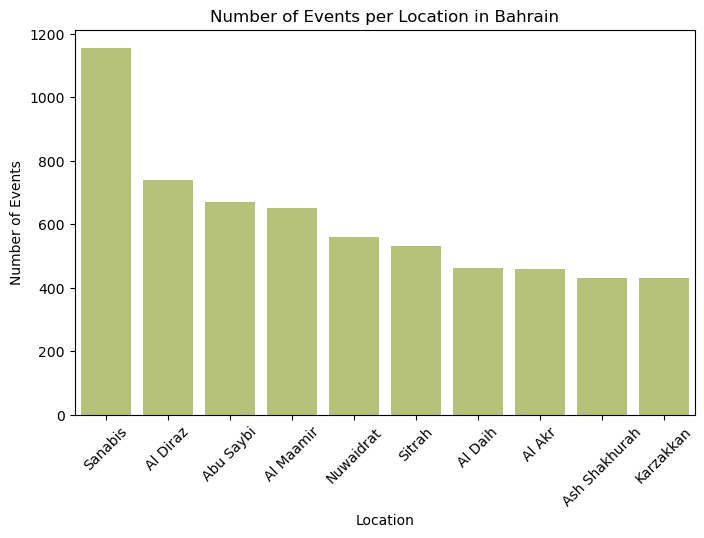

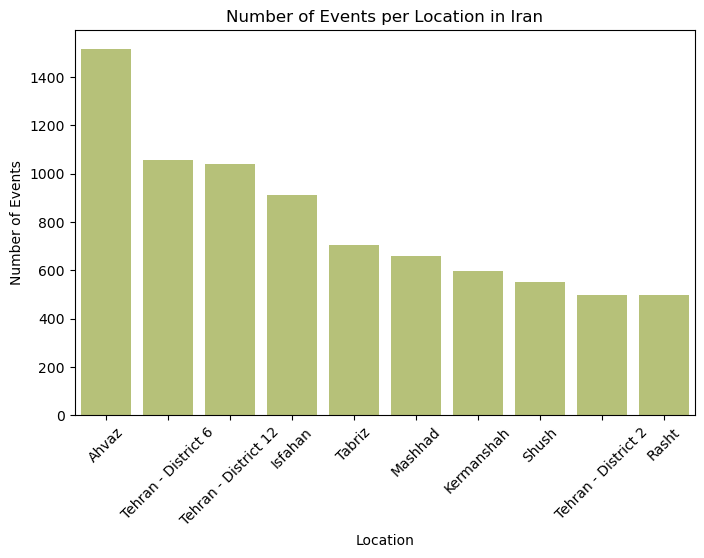

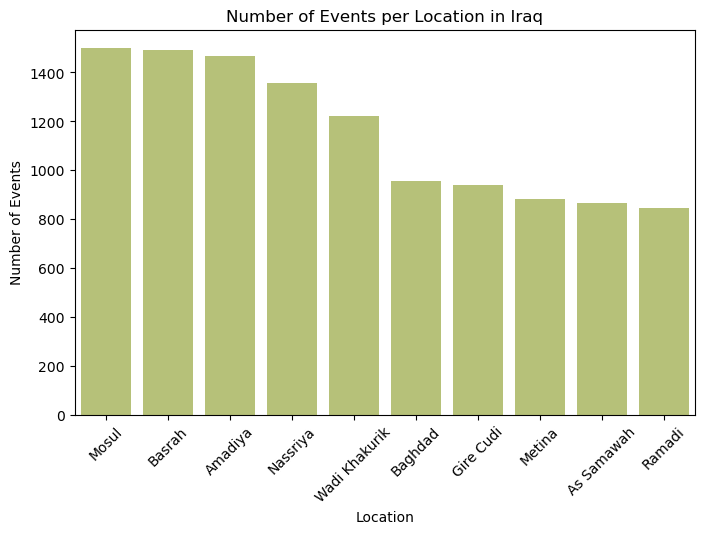

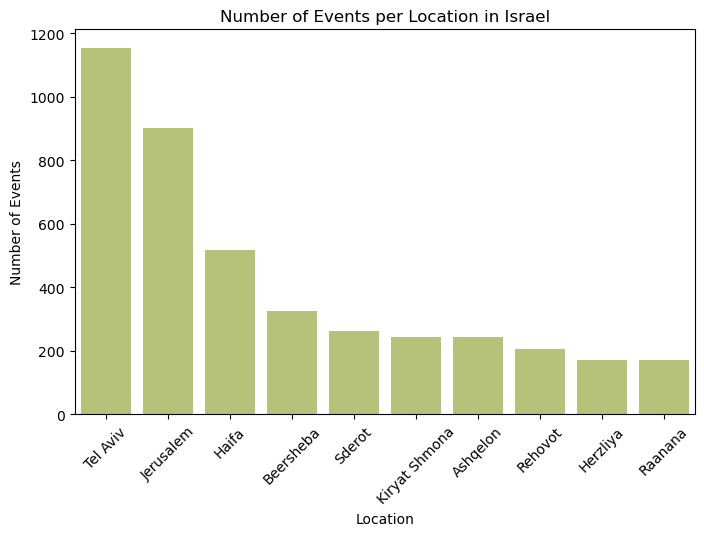

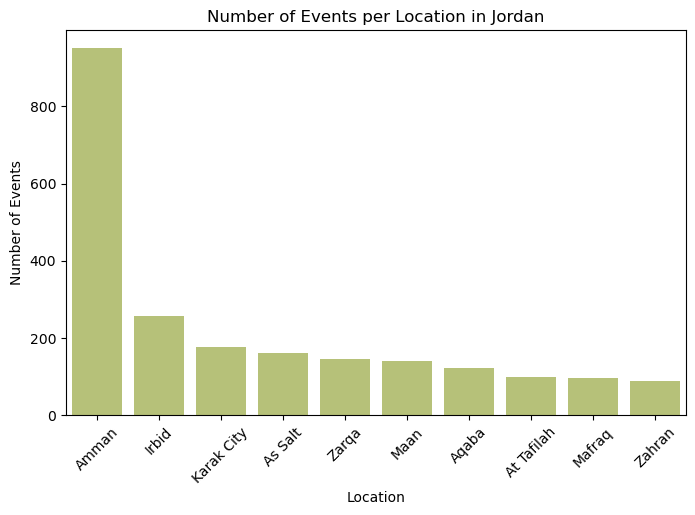

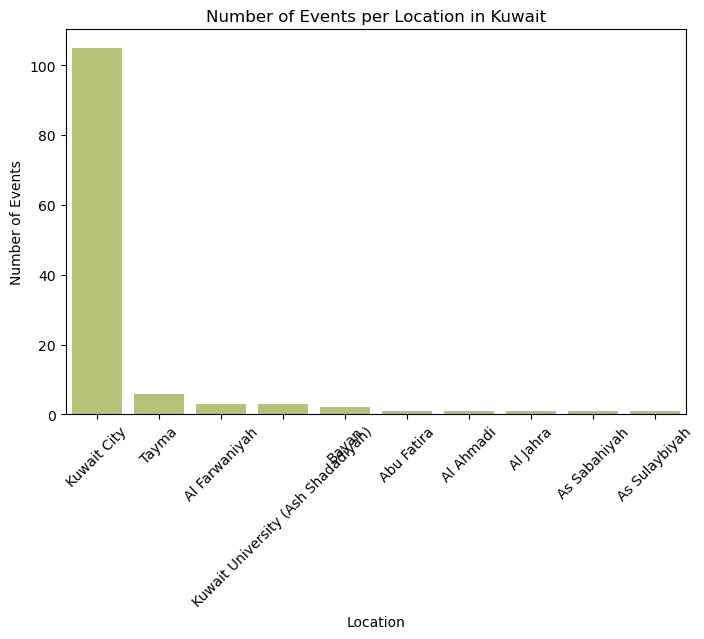

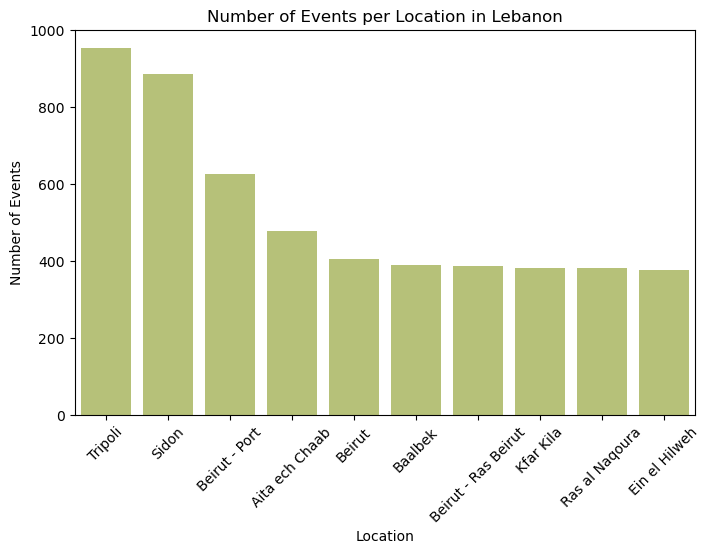

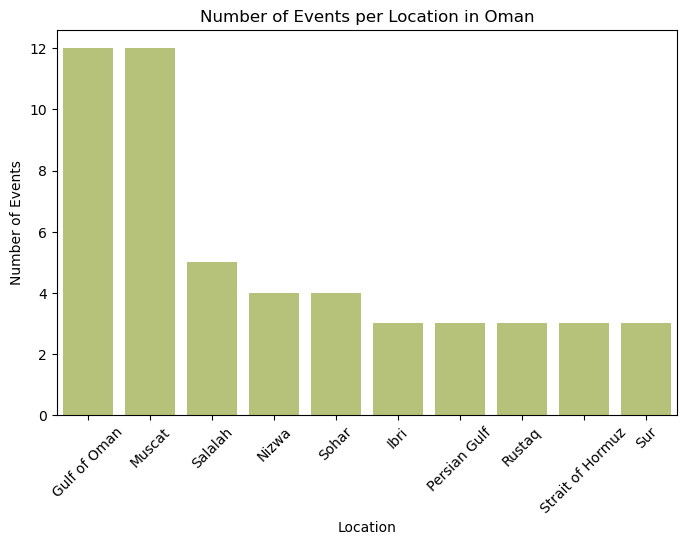

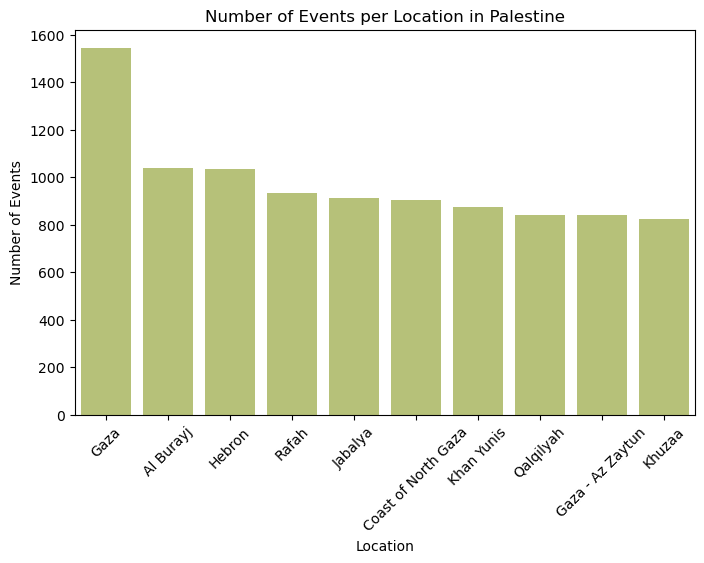

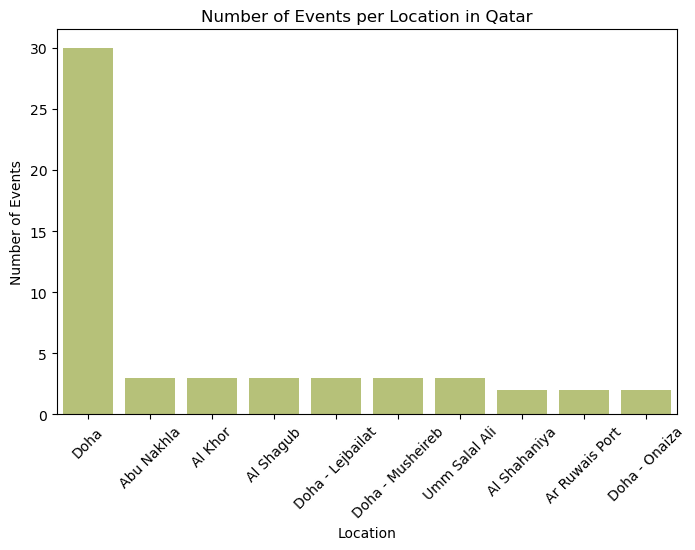

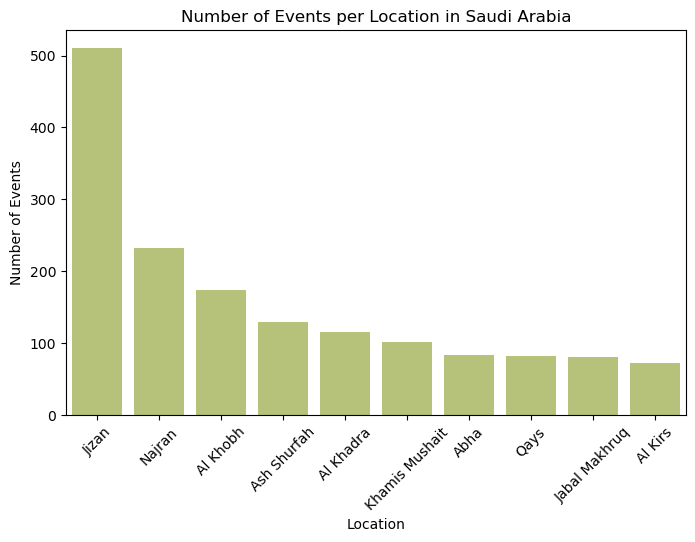

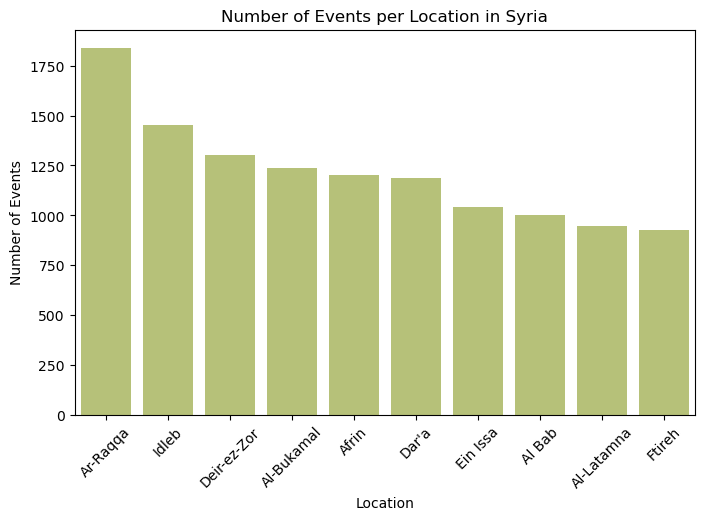

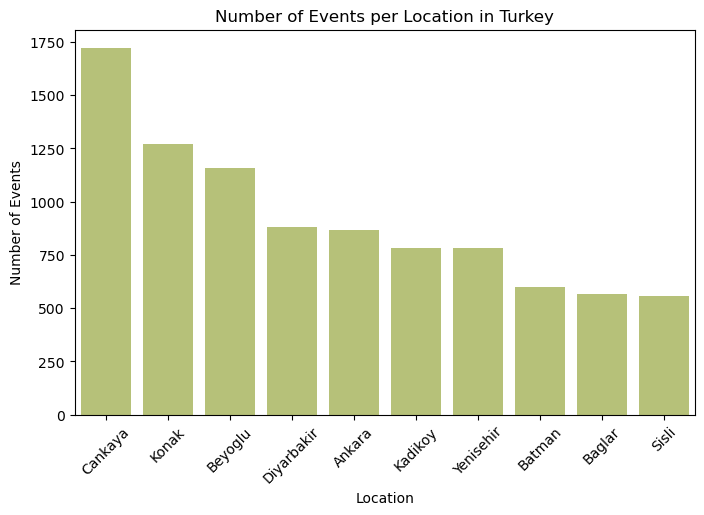

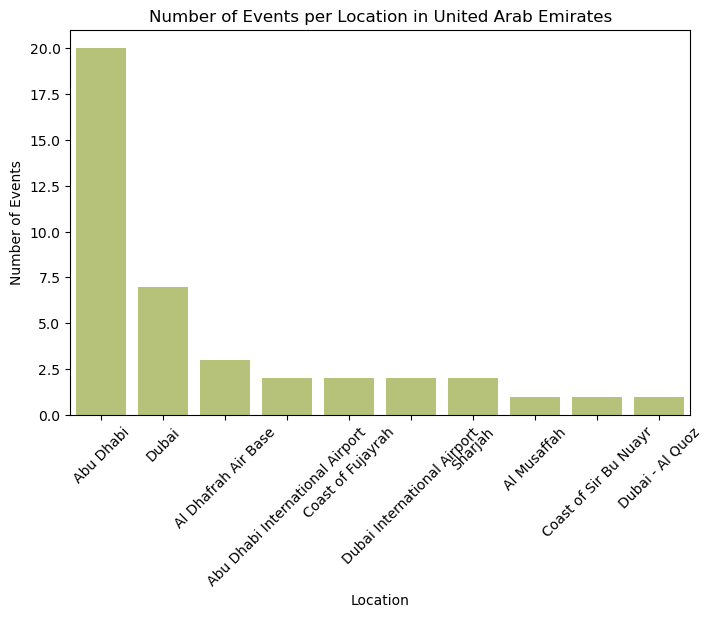

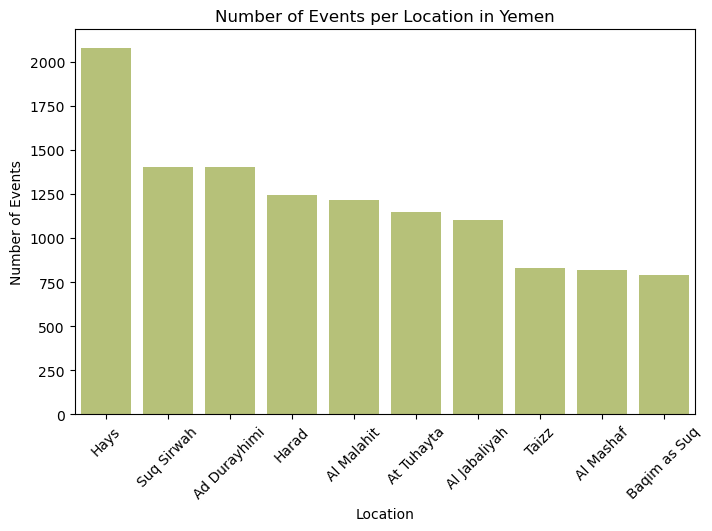

In [12]:
#took each country alone
countries = top_locations['country'].unique()

for country in countries:
    #frame for each country its locations
    df_country = top_locations[top_locations['country'] == country]
    
    plt.figure(figsize=(8,5))
    sns.barplot(x='location', y='count', data=df_country, color='#BECD6D')
    plt.title(f"Number of Events per Location in {country}")
    plt.xlabel("Location")
    plt.ylabel("Number of Events")
    plt.xticks(rotation=45)
    plt.show()

In [13]:
top_sources = data.groupby(['country', 'source']).size().groupby(level=0, group_keys=False).nlargest(10).reset_index(name="count")
print(top_sources)

     country                                             source  count
0    Bahrain             14 February Revolution Youth Coalition   5774
1    Bahrain                                            Al Wafa   1513
2    Bahrain                                 Revolution Bahrain    816
3    Bahrain                                          LuaLua TV    809
4    Bahrain  14 February Revolution Youth Coalition; Bahrai...    561
..       ...                                                ...    ...
145    Yemen  Yemen Data Project; Yemen News Agency (SABA) -...   3714
146    Yemen                                        Ansar Allah   3451
147    Yemen                     Al Masirah; Yemen Data Project   3398
148    Yemen                    Al Amaliqah; Yemen Data Project   3345
149    Yemen                                       Aden al Ghad   3227

[150 rows x 3 columns]


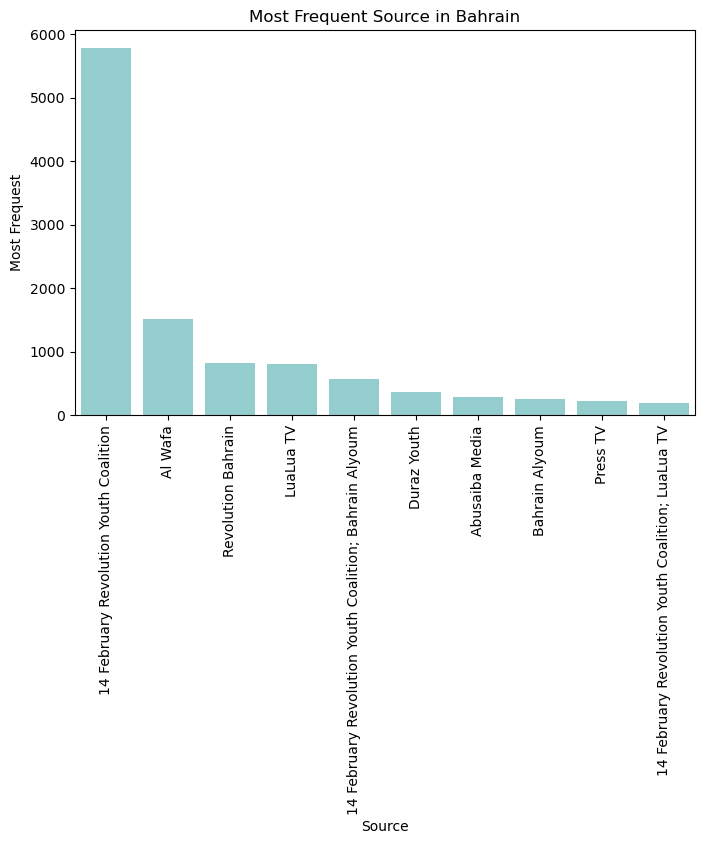

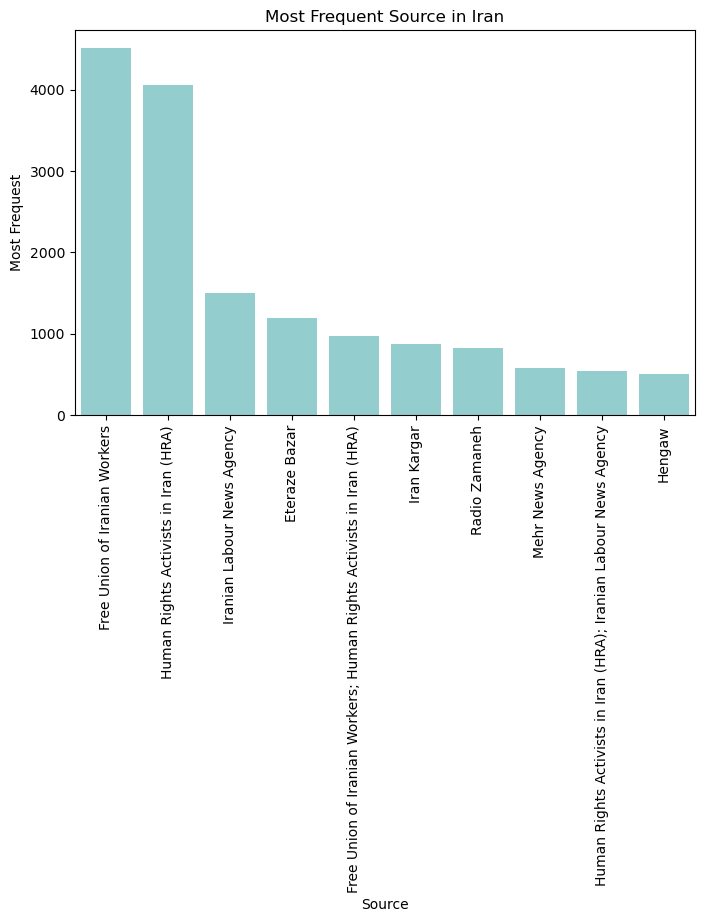

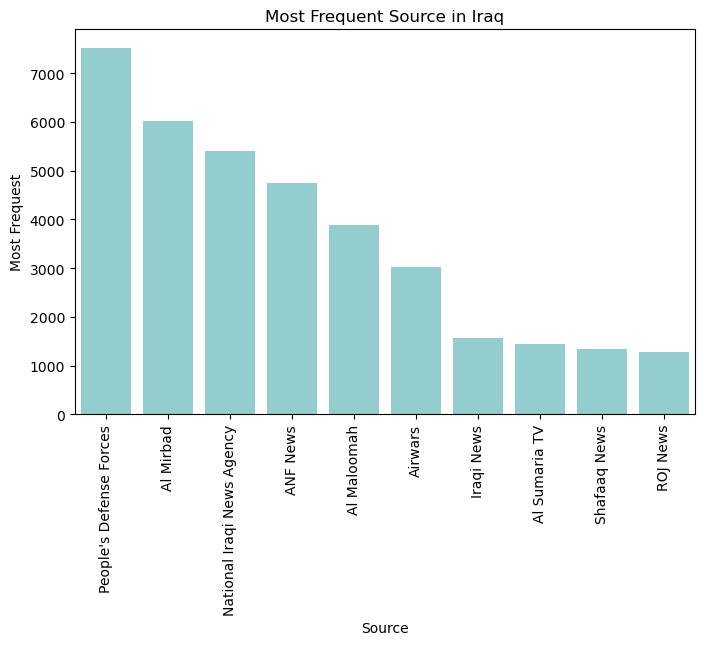

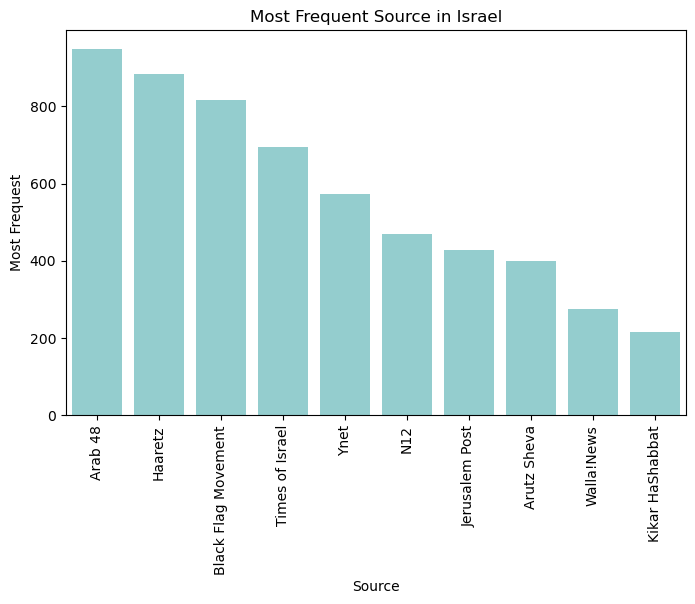

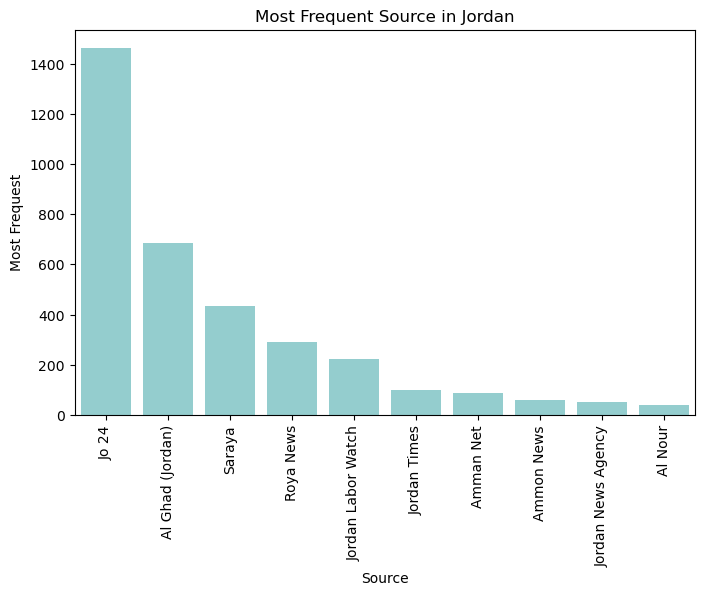

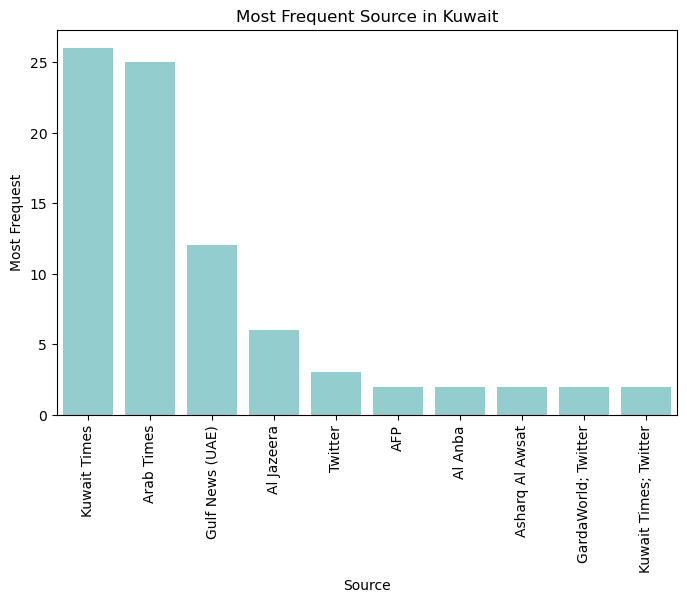

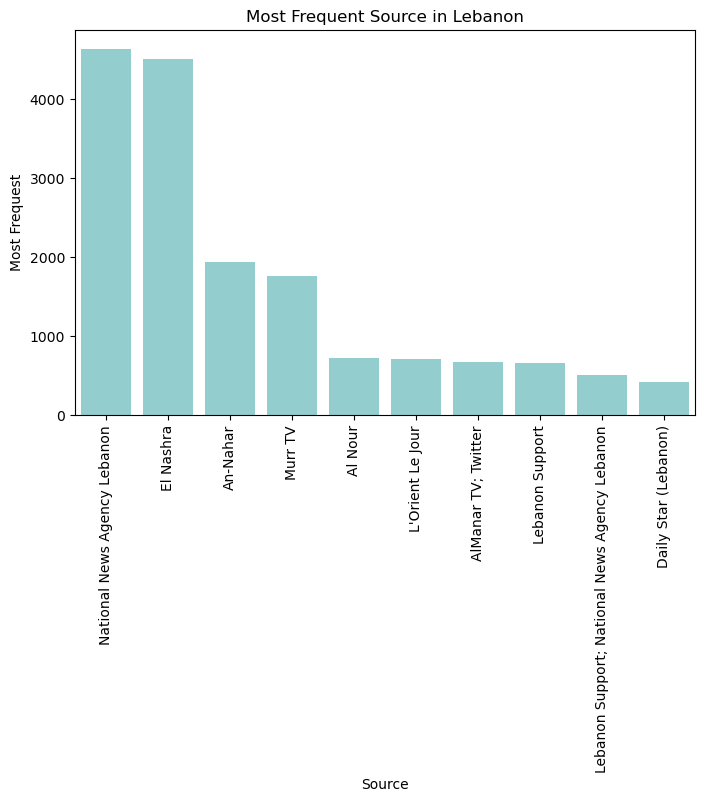

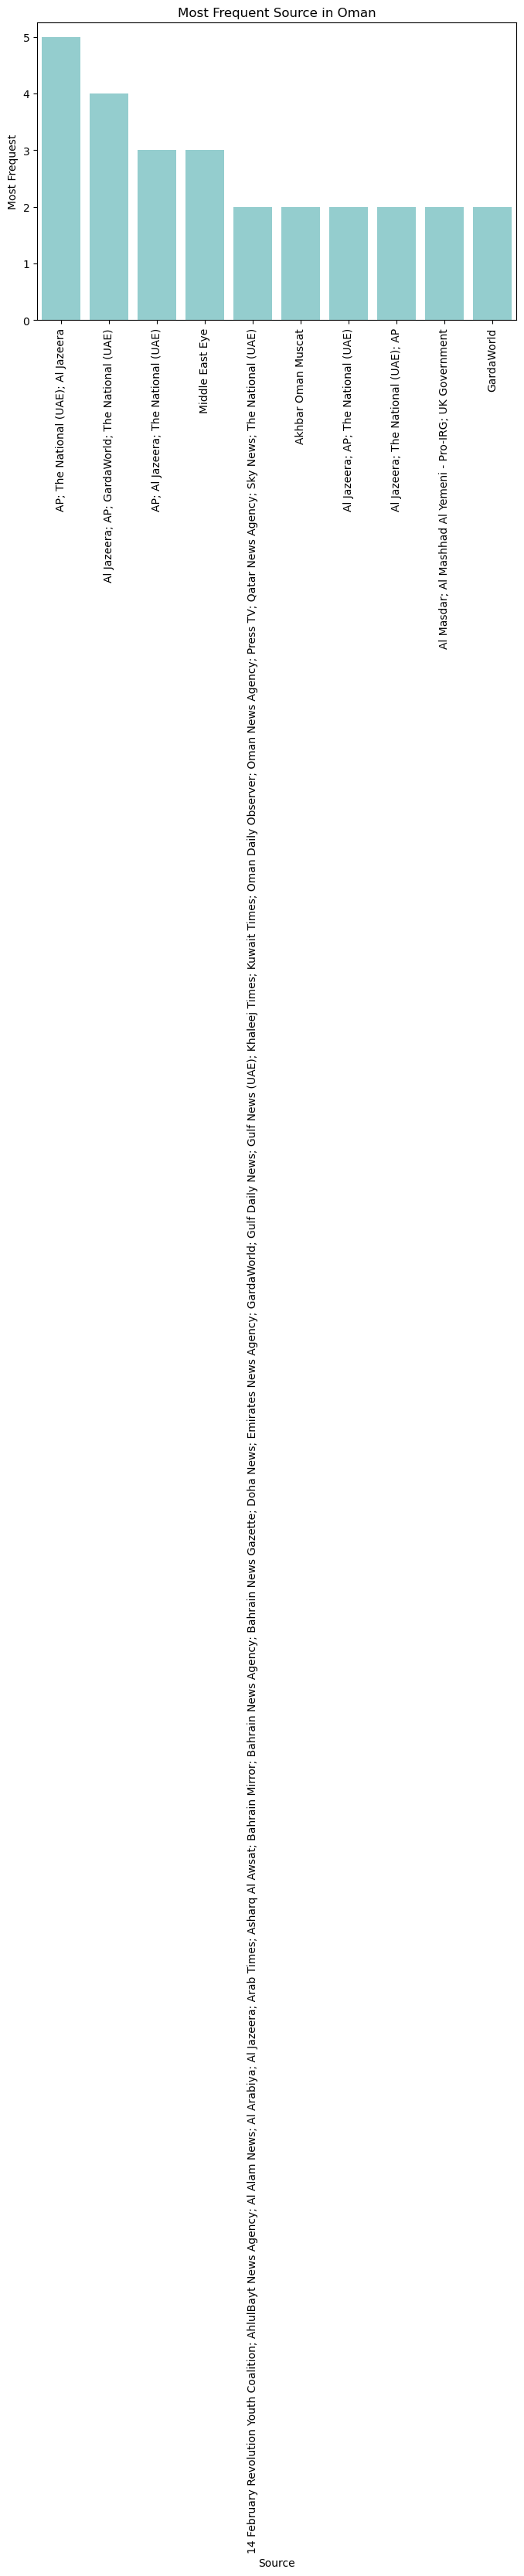

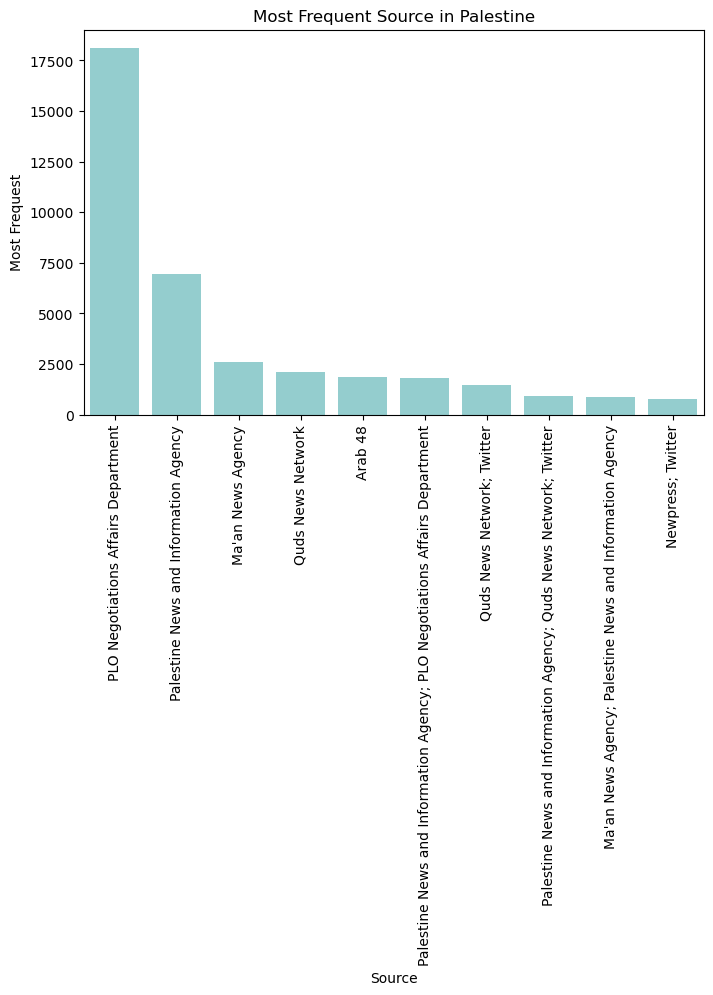

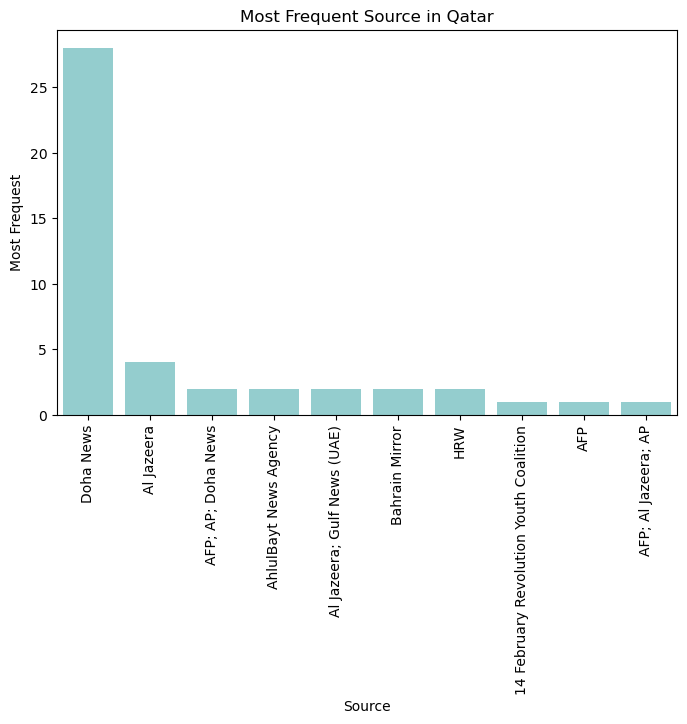

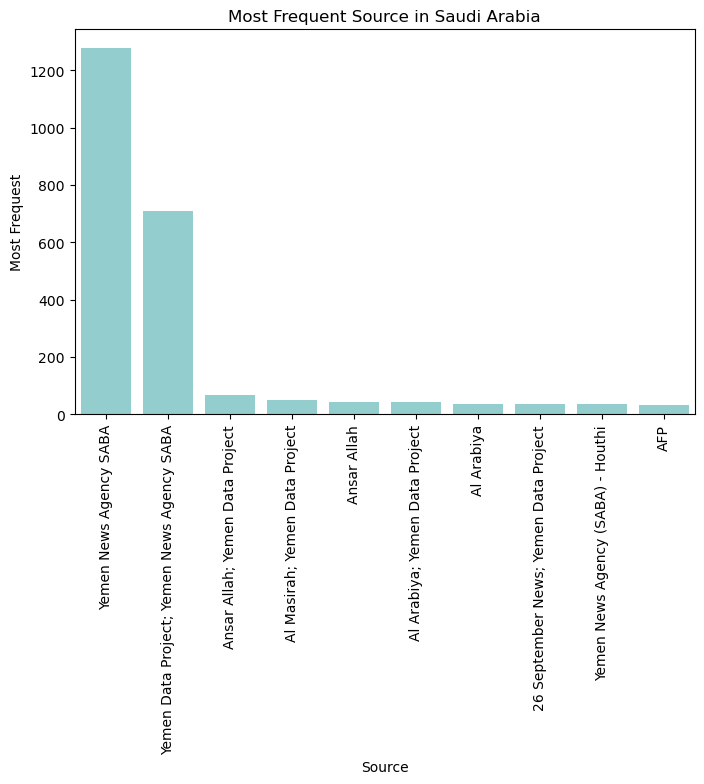

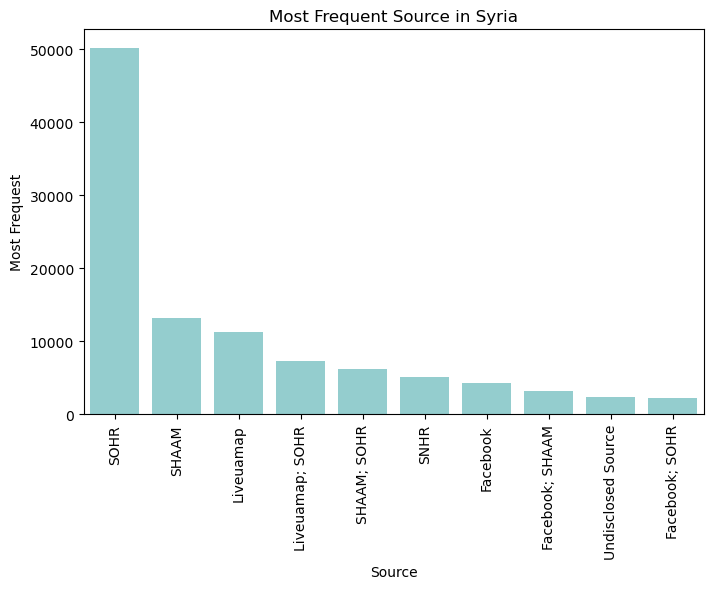

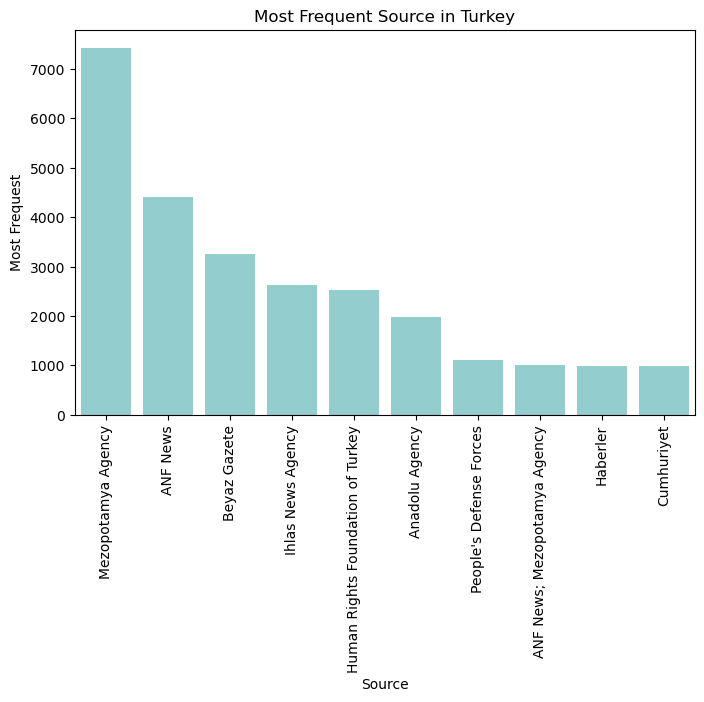

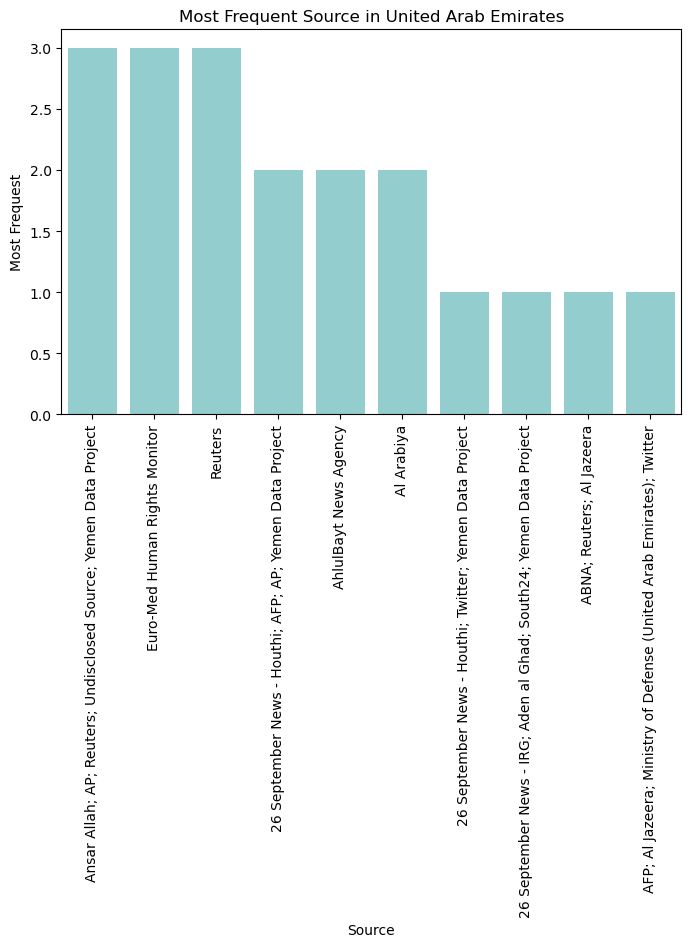

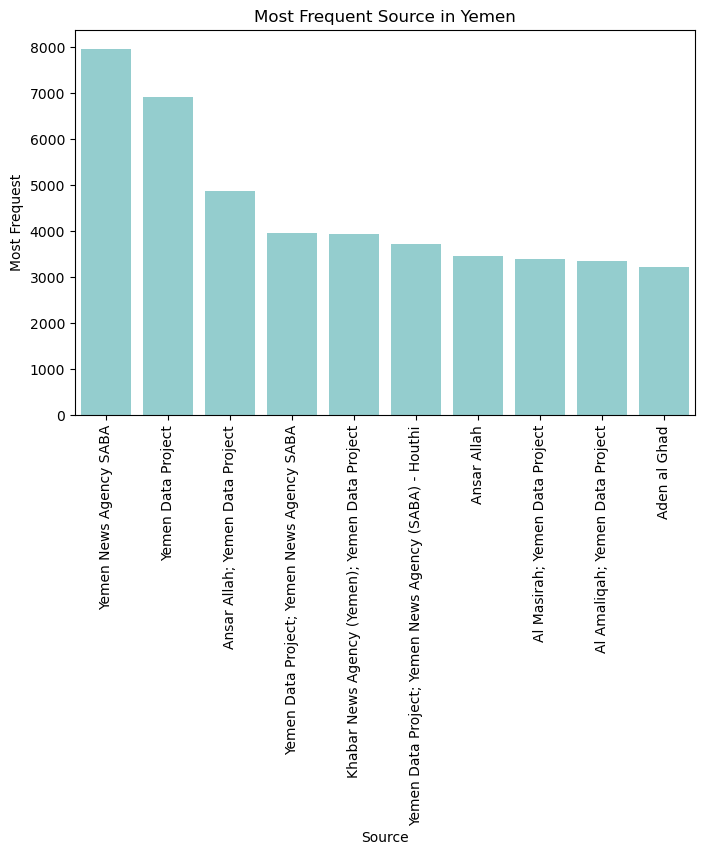

In [14]:
for country in countries:
    df_country = top_sources[top_sources['country'] == country]
    plt.figure(figsize=(8,5))
    sns.barplot(x='source', y='count',data=df_country, color="#8AD6D8")
    plt.title(f"Most Frequent Source in {country}")
    plt.xlabel("Source")
    plt.ylabel("Most Frequest")
    plt.xticks(rotation=90)
    plt.show()

In [15]:
top_disorder_type= data.groupby(['country', 'disorder_type']).size().reset_index(name="counts")
print(top_disorder_type)

                 country                       disorder_type  counts
0                Bahrain                      Demonstrations   12728
1                Bahrain                  Political violence      81
2                Bahrain  Political violence; Demonstrations      22
3                Bahrain              Strategic developments     164
4                   Iran                      Demonstrations   26204
5                   Iran                  Political violence    1383
6                   Iran  Political violence; Demonstrations      97
7                   Iran              Strategic developments    1098
8                   Iraq                      Demonstrations    8742
9                   Iraq                  Political violence   44676
10                  Iraq  Political violence; Demonstrations      98
11                  Iraq              Strategic developments    5909
12                Israel                      Demonstrations    8511
13                Israel          

In [16]:
df_lebanon = data[data['country'] == 'Lebanon']

In [17]:
counts = df_lebanon['disorder_type'].value_counts()
print(counts)

disorder_type
Political violence                    14081
Demonstrations                        12519
Strategic developments                  886
Political violence; Demonstrations       21
Name: count, dtype: int64


Text(0, 0.5, '')

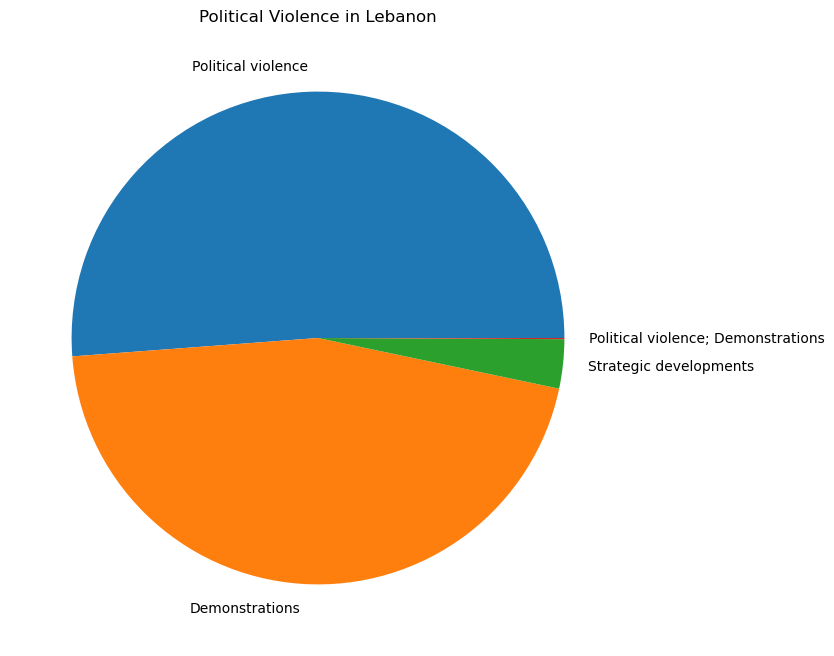

In [18]:
counts.plot(kind='pie')
plt.title("Political Violence in Lebanon")
plt.ylabel(None)

In [ ]:
# methodd to get sentiment label
def get_sentiment(text):
    score = TextBlob(str(text)).sentiment.polarity
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to notes
data['sentiment'] = data['notes'].apply(get_sentiment)

In [ ]:
sentiment_counts = data.groupby(['country', 'sentiment']).size().reset_index(name='counts')
print(sentiment_counts)